<a href="https://colab.research.google.com/github/divyuk/deep-learning/blob/dl-1/activation_function_explorations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size' : 18})

In [3]:
x = torch.linspace(-4,4,101)
# Function to return the activation functions
def activation_function(actfun):
  # this code replaces torch.relu with torch.<actfun>
  actfun = getattr(torch,actfun) # returns torch.actfun you specified
  return actfun( x )

In [7]:
x

tensor([-4.0000e+00, -3.9200e+00, -3.8400e+00, -3.7600e+00, -3.6800e+00,
        -3.6000e+00, -3.5200e+00, -3.4400e+00, -3.3600e+00, -3.2800e+00,
        -3.2000e+00, -3.1200e+00, -3.0400e+00, -2.9600e+00, -2.8800e+00,
        -2.8000e+00, -2.7200e+00, -2.6400e+00, -2.5600e+00, -2.4800e+00,
        -2.4000e+00, -2.3200e+00, -2.2400e+00, -2.1600e+00, -2.0800e+00,
        -2.0000e+00, -1.9200e+00, -1.8400e+00, -1.7600e+00, -1.6800e+00,
        -1.6000e+00, -1.5200e+00, -1.4400e+00, -1.3600e+00, -1.2800e+00,
        -1.2000e+00, -1.1200e+00, -1.0400e+00, -9.6000e-01, -8.8000e-01,
        -8.0000e-01, -7.2000e-01, -6.4000e-01, -5.6000e-01, -4.8000e-01,
        -4.0000e-01, -3.2000e-01, -2.4000e-01, -1.6000e-01, -8.0000e-02,
        -8.9407e-08,  8.0000e-02,  1.6000e-01,  2.4000e-01,  3.2000e-01,
         4.0000e-01,  4.8000e-01,  5.6000e-01,  6.4000e-01,  7.2000e-01,
         8.0000e-01,  8.8000e-01,  9.6000e-01,  1.0400e+00,  1.1200e+00,
         1.2000e+00,  1.2800e+00,  1.3600e+00,  1.4

In [10]:
x[[0,-1]]

tensor([-4.,  4.])

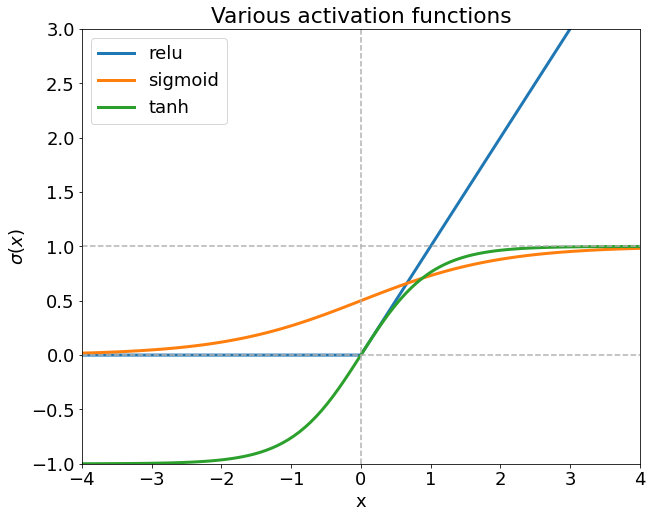

In [11]:
# the activation functions
activation_funs = [ 'relu', 'sigmoid', 'tanh' ]

fig = plt.figure(figsize=(10,8))

for actfun in activation_funs:
  plt.plot(x,activation_function(actfun),label=actfun,linewidth=3)

# add reference lines
dashlinecol = [.7,.7,.7]
plt.plot(x[[0,-1]],[0,0],'--',color=dashlinecol)
plt.plot(x[[0,-1]],[1,1],'--',color=dashlinecol)
plt.plot([0,0],[-1,3],'--',color=dashlinecol)

# make the plot look nicer
plt.legend()
plt.xlabel('x')
plt.ylabel('$\sigma(x)$')
plt.title('Various activation functions')
plt.xlim(x[[0,-1]])
plt.ylim([-1,3])
plt.show()

# Differences between torch and torch.nn

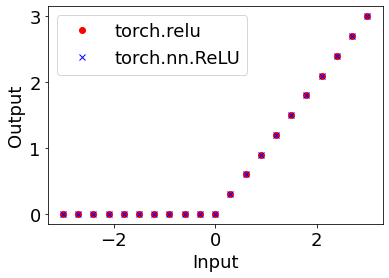

In [12]:
x1 = torch.linspace(-3,3,21)

# in torch
y1 = torch.relu(x1)

# in torch.nn
f = torch.nn.ReLU()
y2 = f(x1)


# the results are the same
plt.plot(x1,y1,'ro',label='torch.relu')
plt.plot(x1,y2,'bx',label='torch.nn.ReLU')
plt.legend()
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

In [ ]:
# Both are same-->
"""
The short answer is none. The longer answer is that our binding code to cpp is set up so that most 
low level optimized functions (like relu) get bound to the torch.foo namespace. 
In this case, you can use torch.relu and torch.nn.functional.relu interchangeably yes.
"""

In [ ]:
# List of activation functions in PyTorch:
#  https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

In [ ]:
# Why non-linearity is introduced to neural networks?
"""
The primary enhancement we will introduce is nonlinearity—a mapping between input and output
 that isn't a simple weighted sum of the input's elements. Nonlinearity enhances
 the representational power of neural networks and, when used correctly, improves the prediction accuracy in many problems.

 Nonlinearity is a term used in statistics to describe a situation where
  there is not a straight-line or direct relationship between an independent variable and a dependent variable.
  In a nonlinear relationship, changes in the output do not change in direct proportion to changes in any of the inputs.
"""

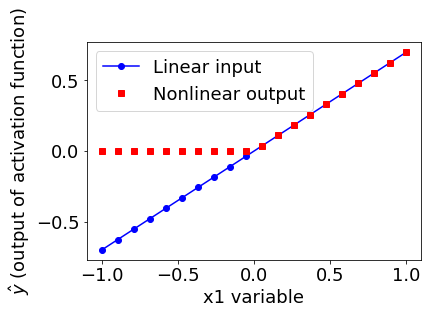

In [13]:
x1 = torch.linspace(-1,1,20)
x2 = 2*x1

# and corresponding weights
w1 = -.3
w2 = .5

# their linear combination
linpart = x1*w1 + x2*w2

# and the nonlinear output
y = torch.relu(linpart)

# and plot!
plt.plot(x1,linpart,'bo-',label='Linear input')
plt.plot(x1,y,'rs',label='Nonlinear output')
plt.ylabel('$\\hat{y}$ (output of activation function)')
plt.xlabel('x1 variable')
# plt.ylim([-.1,.1]) # optional -- uncomment and modify to zoom in
plt.legend()
plt.show()